<a href="https://colab.research.google.com/github/akankshaj-8799/Final-Year-Project/blob/main/Multivariate_Covid_19_Prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
 #Importing the dataset
path = 'https://raw.githubusercontent.com/akankshaj-8799/Final-Year-Project/refs/heads/main/worldwide_covid-19.csv'

In [ ]:
 #reading the dataset using pandas and displaying the top 5 dataset
df = pd.read_csv(path)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
 #displaying bottom 5 dataset
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


In [ ]:
#Checking the information of the data in the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
#coverting data into date-time format
df = pd.read_csv(path,parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
 # again checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


In [ ]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
#adding new column Active by calculating active
active = df['Confirmed'] - df['Recovered'] - df['Deaths']
df['Active'] = active
df.tail()

,Date,Country,Confirmed,Recovered,Deaths,Active
161563,2022-04-12,Zimbabwe,247094,0,5460,241634
161564,2022-04-13,Zimbabwe,247160,0,5460,241700
161565,2022-04-14,Zimbabwe,247208,0,5462,241746
161566,2022-04-15,Zimbabwe,247237,0,5462,241775
161567,2022-04-16,Zimbabwe,247237,0,5462,241775


In [ ]:
 #India
df_india = df[df['Country']=='India']
df_india.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
65280,2020-01-22,India,0,0,0,0
65281,2020-01-23,India,0,0,0,0
65282,2020-01-24,India,0,0,0,0
65283,2020-01-25,India,0,0,0,0
65284,2020-01-26,India,0,0,0,0


In [ ]:
df_india.groupby('Date')['Confirmed'].sum().reset_index()

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
811,2022-04-12,43038016
812,2022-04-13,43039023
813,2022-04-14,43039972
814,2022-04-15,43040947


In [ ]:
confirmed=df_india.reset_index()[['Date','Confirmed','Recovered','Deaths']].rename({'Date':'ds','Confirmed':'y','Recovered':'rec','Deaths':'deaths'},axis='columns')

In [ ]:
confirmed

,ds,y,rec,deaths
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
811,2022-04-12,43038016,0,521736
812,2022-04-13,43039023,0,521737
813,2022-04-14,43039972,0,521743
814,2022-04-15,43040947,0,521747


In [ ]:
train=confirmed[(confirmed['ds']>='2020-01-22') & (confirmed['ds']<='2021-03-15')]
test=confirmed[(confirmed['ds']>'2021-03-15')& (confirmed['ds']<='2021-08-4')]

In [ ]:
train.shape

(419, 4)

In [ ]:
test.shape

(142, 4)

In [ ]:
test.head()

,ds,y,rec,deaths
419,2021-03-16,11438734,11045284,159044
420,2021-03-17,11474605,11063025,159216
421,2021-03-18,11514331,11083679,159370
422,2021-03-19,11555284,11107332,159558
423,2021-03-20,11599130,11130288,159755


In [ ]:
 from prophet import Prophet
### a library in python created by facebook for the time series analysis (forecasting)

In [ ]:
#### Building the Model
m = Prophet(interval_width=0.95)

In [ ]:
m.add_regressor('rec',standardize=False)
m.add_regressor('deaths',standardize=False)

In [ ]:
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssgec7nl/l1sfcrst.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssgec7nl/3tosmnz8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74113', 'data', 'file=/tmp/tmpssgec7nl/l1sfcrst.json', 'init=/tmp/tmpssgec7nl/3tosmnz8.json', 'output', 'file=/tmp/tmpssgec7nl/prophet_model1e1hpzgz/prophet_model-20241124121320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:13:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:13:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:13:20 - cmdstanpy - ERROR - Chain [1]

In [ ]:
#m.params

In [ ]:
 future=m.make_future_dataframe(periods=142)
future.tail()

,ds
556,2021-07-31
557,2021-08-01
558,2021-08-02
559,2021-08-03
560,2021-08-04


In [ ]:
future['rec']=confirmed ['rec']

In [ ]:
future['deaths']=confirmed ['deaths']

In [ ]:
future

,ds,rec,deaths
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
556,2021-07-31,30820521,424351
557,2021-08-01,30857467,424773
558,2021-08-02,30896354,425195
559,2021-08-03,30933022,425757


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
556,2021-07-31,2.230114e+07,2.007084e+07,2.511419e+07
557,2021-08-01,2.232710e+07,2.008654e+07,2.516706e+07
558,2021-08-02,2.234970e+07,2.007953e+07,2.521735e+07
559,2021-08-03,2.237387e+07,2.008013e+07,2.526428e+07
560,2021-08-04,2.240313e+07,2.008798e+07,2.532415e+07


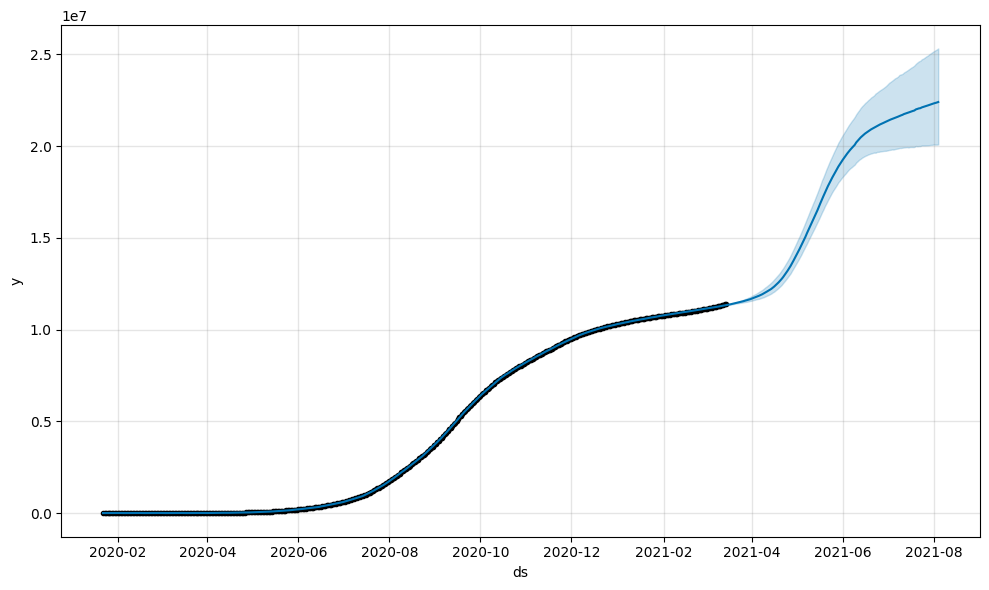

In [ ]:
fig1=m.plot(forecast)

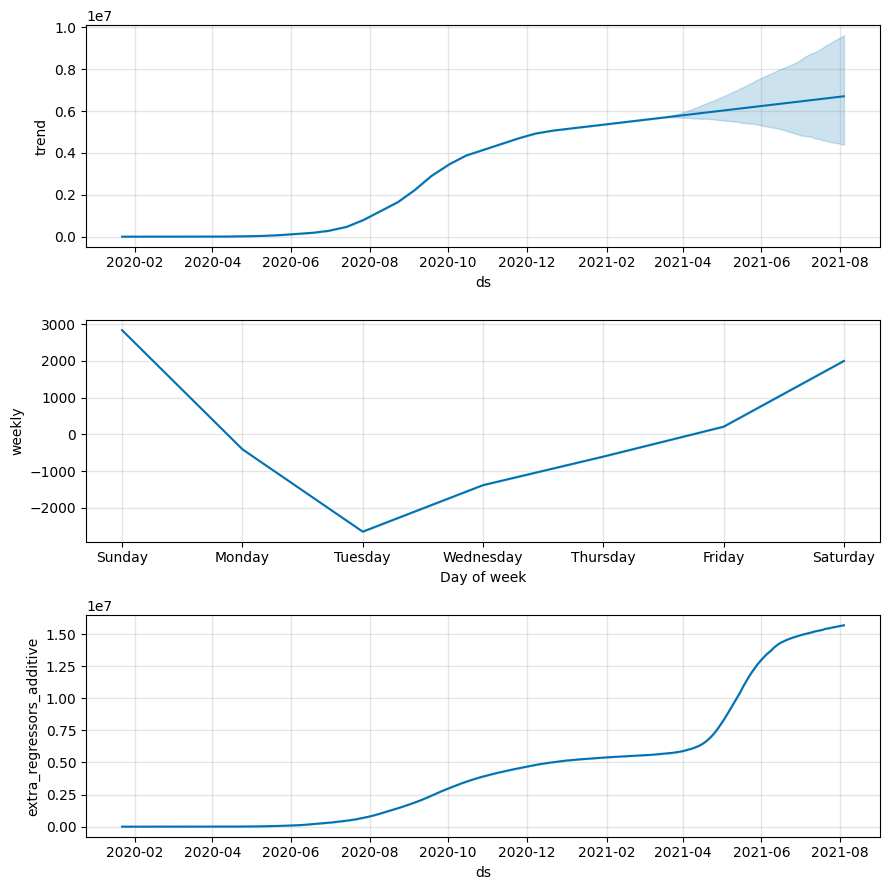

In [ ]:
fig2=m.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv=cross_validation(model=m,initial='180 days', horizon='90 days')
df_p=performance_metrics(df_cv)
df_p

INFO:prophet:Making 4 forecasts with cutoffs between 2020-08-02 00:00:00 and 2020-12-15 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpssgec7nl/hzq9ksq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssgec7nl/qkmpa9ed.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35933', 'data', 'file=/tmp/tmpssgec7nl/hzq9ksq1.json', 'init=/tmp/tmpssgec7nl/qkmpa9ed.json', 'output', 'file=/tmp/tmpssgec7nl/prophet_model8j99etxb/prophet_model-20241124121350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:13:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
12:13:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssgec7nl/2mb94tti.json
DE

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,8.185632e+09,9.047448e+04,7.074301e+04,0.016648,0.008169,0.016383,0.222222
1,10 days,1.064944e+10,1.031961e+05,8.168049e+04,0.019120,0.008622,0.018784,0.222222
2,11 days,1.328635e+10,1.152664e+05,9.210585e+04,0.021348,0.010884,0.020938,0.222222
3,12 days,1.641005e+10,1.281017e+05,1.026160e+05,0.023554,0.013528,0.023061,0.250000
4,13 days,1.991730e+10,1.411287e+05,1.134057e+05,0.025741,0.017892,0.025158,0.250000
...,...,...,...,...,...,...,...,...
77,86 days,1.523014e+12,1.234105e+06,1.000523e+06,0.113987,0.082092,0.104067,0.500000
78,87 days,1.563770e+12,1.250508e+06,1.011376e+06,0.114779,0.082261,0.104694,0.500000
79,88 days,1.604229e+12,1.266582e+06,1.021785e+06,0.115527,0.082337,0.105281,0.500000
80,89 days,1.643090e+12,1.281831e+06,1.031491e+06,0.116194,0.082376,0.105801,0.500000


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


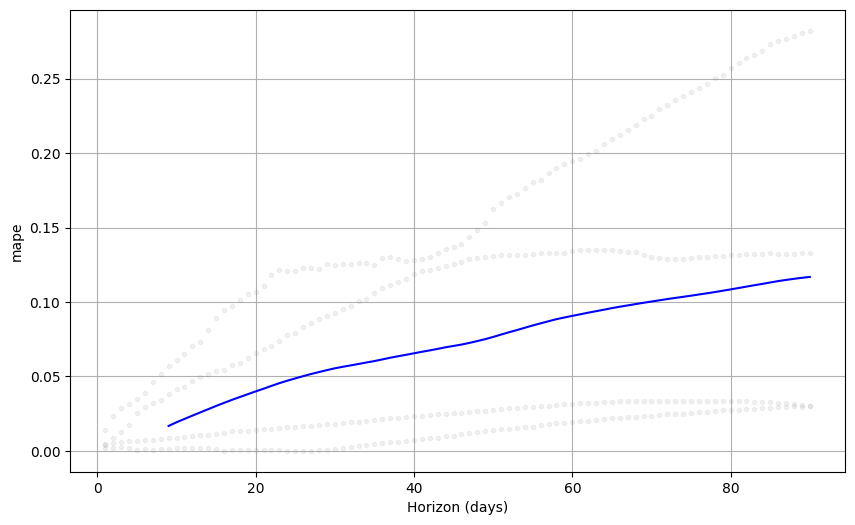

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig3=plot_cross_validation_metric(df_cv,metric='mape')